# Unidade 03 - Avaliação 

- **Alunos(as)**: 
<br>1 - Carmem Stefanie da Silva Cavalcante
<br>2 - Fernanda Laís Pereira de Souza
- **Matrícula**: 



**Avisos**


1. Todas as questões devem ser respondidas através de códigos escritos em linguagem Python 3 (**verificar o tipo do runtime**) e no espaço destinado para esse fim. Criem células Markdown para destacar quando inicia e termina as questões. 


[Cartola FC](https://globoesporte.globo.com/cartola-fc/) é um jogo fictício no qual as pessoas montam seus times com jogadores de futebol da vida real. O jogo é mantido pelo canal de TV por assinatura Sportv e também pela Globo, esse jogo de futebol virtual já conta com mais de 5 milhões de usuários cadastrados.

A base de dados com informações e as variáveis utilizadas para caracterização e pontuação dos jogadores pode ser encontrada nesse [repositório do Github](https://github.com/henriquepgomide/caRtola/tree/master/data). 

- No respectivo repositório encontra-se o arquivo **dados_agregados_limpos.csv**. Em todos os problemas solicitados utilize esse arquivo como a base de dados padrão, além de **descrever os resultados através de gráficos, códigos explicativos e um texto sobre suas conclusões**.


In [0]:
# TODAS AS IMPORTAÇÕES NECESSÁRIAS AO CÓDIGO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as ma

In [0]:
cartola = pd.read_csv('dados_agregados_limpos.csv')
cartola.head()

In [0]:
cartola.ano.unique()

array([2014, 2016, 2017, 2015])

### Questão 1 (2,50 pontos)

Utilizando a **Teoria de  Correlação**  apresentada em sala de aula, desenvolva uma solução/estudo onde seja possível identificar as principais variáveis que caracterizam os jogadores de acordo com a sua posição. 

Para esse estudo, iremos utilizar as primeiras 28 colunas do dataset, deixando de fora as que apresentam médias das colunas anteriores (como avg.FS, por exemplo). Além disso, como queremos calcular a correlação, utilizaremos apenas variavéis quantitativas. 

Assim, percorremos cada posição entre as possíveis posições dos jogadores. Para cada tipo de posição, separamos os dados em uma seleção separada. Em seguida, percorremos todas as nossas variáveis, já previamente tratadas, e calculamos a correlação - através da função pearsonr - entre elas e a variável Pontos¹. Essa correlação, se diferente de 'nan'², é guardada em um dicionário que será futuramente analisado. 

¹A escolha da variável Pontos como ponta da correlação ocorreu pois quantos mais pontos fez o jogador, melhor ele atuou em sua função e posição específica. 

²Em algumas posições todos os valores de uma determinada coluna/variável eram iguais a 0 (como no caso de jogadores que são Atacantes e da coluna DD - defesas difíceis), gerando uma correlação indefinida e enviesando a análise.

In [0]:
from scipy.stats.stats import pearsonr
from collections import OrderedDict
from operator import itemgetter
import seaborn as sns

#separação das variáveis desejadas 
variaveis = cartola.columns[0:29]
posicoes = cartola.Posicao.unique()

v_certas = []
relacao = {}

#separação das variáveis quantitativas
for v in variaveis:
  if(cartola[v].dtype == 'float64' or cartola[v].dtype == 'int64' ):
    v_certas.append(v)

for pos in posicoes:
  selection = cartola[cartola['Posicao'] == pos]
  for vc in v_certas:
    r, p = pearsonr(selection['Pontos'], selection[vc])
    if(ma.isnan(r) != True):
      relacao[vc] = r
  
  print(pos, "\n")  
  for key, value in sorted(relacao.items(), key = itemgetter(1), reverse = True):
    print(key, " - ", value)
  print("\n\n")



Com o dicionário preenchido, ordenamos ele em ordem decrescente, de modo que as variáveis com grau de correlação maior fiquem nas primeiras posições. Assim, é possível ver quais variáveis afetam cada tipo de posição. Uma outra maneira de comprovar e ver isso é gerando scatterplots, como será mostrado a seguir para duas posições e variáveis escolhidas com base na análise anterior.




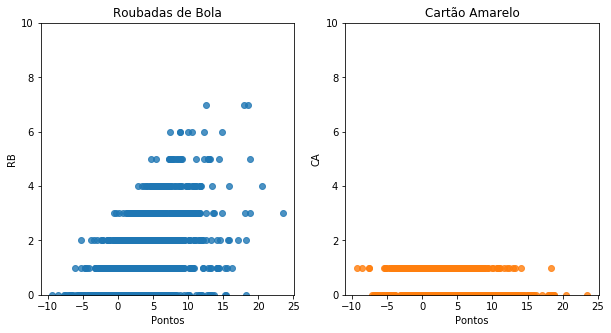

In [0]:
#Zagueiros
zagueiros = cartola[cartola['Posicao'] == 'zag']

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x=zagueiros['Pontos'], y=zagueiros['RB'],fit_reg=False, ax=ax1)
sns.regplot(x=zagueiros['Pontos'], y=zagueiros['CA'],fit_reg=False, ax=ax2)

ax1.set_title("Roubadas de Bola")
ax2.set_title("Cartão Amarelo")

ax1.set(ylim=(0,10))
ax2.set(ylim=(0,10))
plt.show()

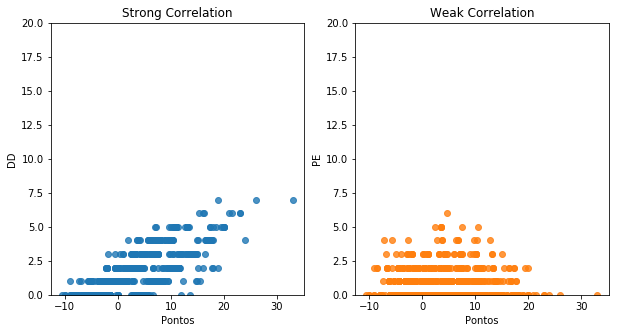

In [0]:
#Goleiros
goleiros = cartola[cartola['Posicao'] == 'gol']

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x=goleiros['Pontos'], y=goleiros['DD'],fit_reg=False, ax=ax1)
sns.regplot(x=goleiros['Pontos'], y=goleiros['PE'],fit_reg=False, ax=ax2)

ax1.set_title("Defesas Dificeis")
ax2.set_title("Passes Errados")

ax1.set(ylim=(0,20))
ax2.set(ylim=(0,20))

plt.show()

### Questão 2 (2,50 pontos)

Utilizando a **Métrica de Z-Score** e uma variável (ou variavéis) de sua escolha, desenvolva uma solução/estudo onde seja possível comparar o desempenho dos atacantes e goleiros quando comparado com todos os outros jogadores da mesma posição.

In [0]:
atacantes = cartola[cartola['Posicao'] == 'ata']
print("Quantidade de atacantes: ",atacantes.A.count())

Quantidade de atacantes:  4050


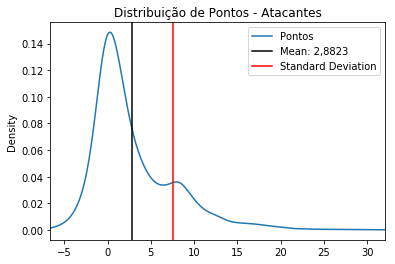

In [0]:
atacantes['Pontos'].plot.kde()
std_dev_pontos = np.std(atacantes['Pontos'], ddof=1)
mean_pontos = np.mean(atacantes['Pontos'])

plt.xlim(min(atacantes['Pontos']), max(atacantes['Pontos']))
plt.axvline((mean_pontos), color='black', label='Mean: 2,8823')
plt.axvline(mean_pontos + std_dev_pontos, color='red', label='Standard Deviation')
plt.title('Distribuição de Pontos - Atacantes')
plt.legend()

In [0]:
atacantes['z-points_ata'] = atacantes['Pontos'].apply(lambda p: (p - mean_pontos)/std_dev_pontos)

cores = ['orange', 'red', 'purple', 'green', 'yellow']
#Obtendo amostras da lista de goleiros para realizar comparações com os demais
amostra_atacantes = atacantes.sample(5, random_state=5)
amostra_atacantes
#------------------------------------------------------------------------------

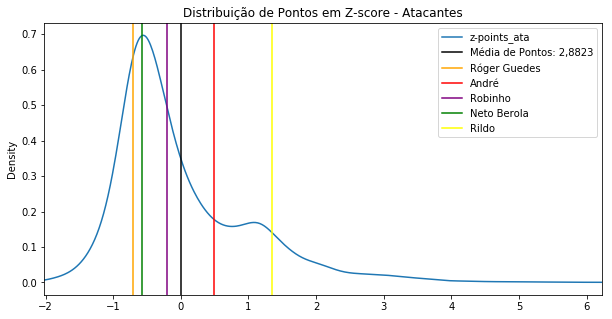

In [0]:
atacantes['z-points_ata'].plot.kde(figsize=(10,5))
plt.xlim(min(atacantes['z-points_ata']), max(atacantes['z-points_ata']))
plt.axvline(0, color="black", label="Média de Pontos: 2,8823")

for x in range(0,len(amostra_atacantes)):
  plt.axvline(amostra_atacantes.iloc[x].loc['z-points_ata'], color=cores[x], label=amostra_atacantes.iloc[x].loc['Apelido'])
  
plt.title('Distribuição de Pontos em Z-score - Atacantes')
plt.legend()

In [0]:
goleiros = cartola[cartola['Posicao'] == 'gol']
print("Quantidade de goleiros: ",goleiros.A.count())

Quantidade de goleiros:  1328


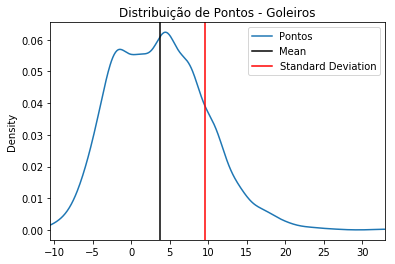

In [0]:
goleiros['Pontos'].plot.kde()
std_dev_pontos = np.std(goleiros['Pontos'])
mean_pontos = goleiros['Pontos'].mean()

plt.xlim(min(goleiros['Pontos']), max(goleiros['Pontos']))
plt.axvline(mean_pontos, color='black', label='Mean')
plt.axvline(mean_pontos + std_dev_pontos, color='red', label='Standard Deviation')
plt.title('Distribuição de Pontos - Goleiros')
plt.legend()

In [0]:
goleiros['z-points_gol'] = goleiros['Pontos'].apply(lambda p: (p - mean_pontos)/std_dev_pontos)

cores = ['orange', 'red', 'purple', 'green', 'yellow']
#Obtendo amostras da lista de goleiros para realizar comparações com os demais
amostra_goleiros = goleiros.sample(5, random_state=1)
amostra_goleiros
#------------------------------------------------------------------------------

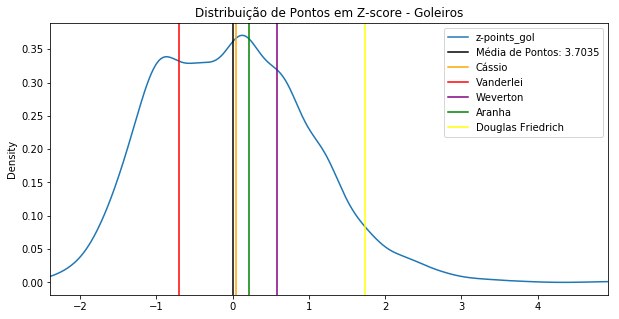

In [0]:
goleiros['z-points_gol'].plot.kde(figsize=(10,5))
plt.xlim(min(goleiros['z-points_gol']), max(goleiros['z-points_gol']))
plt.axvline(0, color="black", label="Média de Pontos: 3.7035")

for x in range(0,len(amostra_goleiros)):
  plt.axvline(amostra_goleiros.iloc[x].loc['z-points_gol'], color=cores[x], label=amostra_goleiros.iloc[x].loc['Apelido'])

plt.title('Distribuição de Pontos em Z-score - Goleiros')
plt.legend()

### Questão 3 (2,00 pontos)

Desenvolva uma solução/estudo onde a partir das **métricas de variância e desvio padrão**  e uma variável (ou variáveis) de sua escolha possa ser possível classificar o desempenho dos diferentes times de futebol.

In [0]:
clubes_lista = cartola['ClubeID'].value_counts().sort_index().index.values
print("Clubes:",clubes_lista)

Clubes: ['América-MG' 'Atlético-GO' 'Atlético-MG' 'Atlético-PR' 'Avaí' 'Bahia'
 'Botafogo' 'Chapecoense' 'Corinthians' 'Coritiba' 'Cruzeiro'
 'Figueirense' 'Flamengo' 'Fluminense' 'Grêmio' 'Internacional'
 'Palmeiras' 'Ponte Preta' 'Santa Cruz' 'Santos' 'Sport' 'São Paulo'
 'Vasco' 'Vitória']


In [0]:
# Standard deviation tells us how much the values in a distribution vary (on average) around the mean of that distribution.
def standard_deviation(array):
  array_mean = np.mean(array)
  distances = []
  for value in array:
    distances.append(pow(value-array_mean,2))
  variance = np.mean(distances)
  return ma.sqrt(variance)

In [0]:
clubes_media_PontosMedia = {}

for clube in clubes_lista:
  coluna_PontosMedia = cartola.loc[cartola['ClubeID'] == clube, 'PontosMedia']
  media_PontosMedia = sum(coluna_PontosMedia)/len(coluna_PontosMedia)
  clubes_media_PontosMedia[clube] = media_PontosMedia

clubes_std = standard_deviation(list(clubes_media_PontosMedia.values()))
clubes_media = np.mean(list(clubes_media_PontosMedia.values()))
print("Média de Pontos por Clubes:\n",clubes_media_PontosMedia) 
print("Média de todos os Pontos: ", clubes_media)
print("Standard deviation: ",clubes_std)

Média de Pontos por Clubes:
 {'América-MG': 2.266060606060606, 'Atlético-GO': 2.2387473460721856, 'Atlético-MG': 2.7909559512652256, 'Atlético-PR': 2.4076776246023317, 'Avaí': 2.602972972972971, 'Bahia': 3.3529359430604955, 'Botafogo': 3.4737230419977263, 'Chapecoense': 2.4330841121495346, 'Corinthians': 3.536763372620126, 'Coritiba': 2.685398936170213, 'Cruzeiro': 3.1108263695450287, 'Figueirense': 2.378518518518519, 'Flamengo': 3.1788971269694146, 'Fluminense': 3.004275653923539, 'Grêmio': 3.5505338417540484, 'Internacional': 2.535704918032789, 'Palmeiras': 3.1402998965873836, 'Ponte Preta': 2.8968128161888695, 'Santa Cruz': 3.0322772277227723, 'Santos': 2.890310218978102, 'Sport': 3.137370644139384, 'São Paulo': 2.8800621118012426, 'Vasco': 2.754655532359082, 'Vitória': 2.548750000000003}
Média de todos os Pontos:  2.867817282645483
Standard deviation:  0.38719916706060303


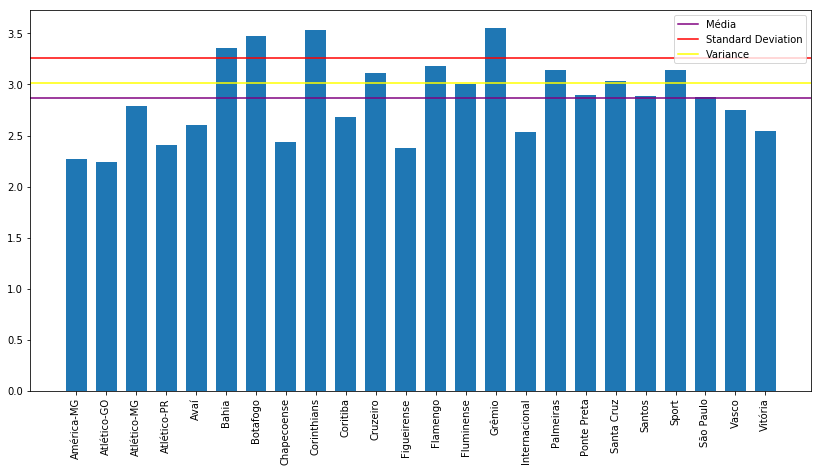

In [0]:
# PODE PLOTAR PONTOS DE CADA TIME E FAZER UM GRÁFICO PRA CADA ANO
# um gráfico de barras pra cada ano, x é o time e y a média de pontos por ano
fig, ax = plt.subplots(figsize=(14,7))
ax.bar(list(clubes_media_PontosMedia.keys()), list(clubes_media_PontosMedia.values()), 0.7)
labels_x = list(clubes_media_PontosMedia.keys())
ax.set_xticklabels(labels_x, rotation=90)
ax.axhline(clubes_media, color='purple', label="Média")
ax.axhline(clubes_media + clubes_std, color='red', label="Standard Deviation")
ax.axhline(pow(clubes_std,2) + clubes_media, color='yellow', label="Variance")
ax.legend()

### Questão 4 (3,00 pontos)

Utilizando a **Teoria de Probabilidade Condicional** encontre a probabilidade de um time ganhar uma partida dado que o mesmo marcou: a) um gol no jogo, b) dois gols no jogo, c) 3 gols no jogo.

In [0]:

partidas_totais = 0 
gol1 = 0;
gol2 = 0;
gol3 = 0;

gol1_ganho = 0;
gol2_ganho = 0;
gol3_ganho = 0;

home_team = cartola[cartola['variable'] == 'home.team']
new_c = pd.pivot_table(home_team, values=['away.score.x', 'home.score.x', 'G'], index=['ClubeID', 'Rodada'], aggfunc=np.sum)
for time in new_c.index:
  df_time = new_c.loc[time]
  
  if(df_time['G'] == 1):
    gol1 += 1
    if(df_time['away.score.x'] < df_time['home.score.x']):
      gol1_ganho += 1;
      
  if(df_time['G'] == 2):
    gol2 += 1
    if(df_time['away.score.x'] < df_time['home.score.x']):
      gol2_ganho += 1;
    
  if(df_time['G'] == 3):
    gol3 += 1
    if(df_time['away.score.x'] < df_time['home.score.x']):
      gol3_ganho += 1;
      
  partidas_totais +=1

print(partidas_totais) 
print(gol1, gol2, gol3)
print(gol1_ganho, gol2_ganho, gol3_ganho)


721
488 117 65
329 81 61


Unimos os dados do dataframe em uma pivot table, de modo que possamos ver como cada time foi em cada rodada, e, assim, verificar quantas vezes cada time ganhou e com que quantidade de gols. Para evitar repetição de jogos (já que cada rodada conta com dois times e, assim, duas linhas na pivot table) separamos apenas os dados dos times que estão jogando em casa. 

Em seguida, percorremos cada rodada de cada time e vemos quantos gols o time em questão fez, e se ele foi bem sucedido ou não no jogo. Assim, obtemos uma questão de numero_de_sucessos/numero_total_de_amostras, possibilitando o cálculo da probabilidade.

In [0]:
prob_1_gol = gol1_ganho/gol1 * 100
prob_2_gol = gol2_ganho/gol2 * 100
prob_3_gol = gol3_ganho/gol3 * 100

print("Probabilidade da ganhar tendo feito apenas 1 gol: ", prob_1_gol, "%")
print("Probabilidade da ganhar tendo feito 2 gols: ", prob_2_gol, "%")
print("Probabilidade da ganhar tendo feito 3 gols: ", prob_3_gol, "%")